In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
import datetime
from sklearn.model_selection import train_test_split
import re

## Load Dataset

In [2]:
data = pd.read_csv('C:/Users/hands/Desktop/Data/Kaggle/Google_play_store/googleplay_modified_for_EDA.csv',
                  parse_dates = ['Last Updated'])
data = data.drop(['Category_int','Unnamed: 0'], axis = 1)

print(data.shape)
data.head(2)

(8886, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [3]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## Preprocessing for prediction

### Generes

Some apps have multiple genres. Let's separate them and put each of them into new columns.

In [4]:
data = pd.concat([data, data['Genres'].str.split(pat = ';', expand = True)], axis = 1)
data.rename(columns = {0:'Genre_1', 1: 'Genre_2'},inplace = True)

print(data.shape)
data.head(3)

(8886, 15)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Genre_1,Genre_2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Art & Design,None
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite ? FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,Art & Design,None


In [5]:
def make_nan(value):
    
    if value is None:
        value = np.nan
        return value
    else:
        return value
    
data['Genre_2'] = data['Genre_2'].apply(make_nan)

In [6]:
data['Genre_2'].head()

0             NaN
1    Pretend Play
2             NaN
3             NaN
4      Creativity
Name: Genre_2, dtype: object

### Android Versions

In [7]:
data['Android Ver'].value_counts().head(15)

4.1 and up            1987
4.0.3 and up          1197
Varies with device    1178
4.0 and up            1092
4.4 and up             789
2.3 and up             573
5.0 and up             481
4.2 and up             330
2.3.3 and up           238
3.0 and up             207
2.2 and up             203
4.3 and up             199
2.1 and up             112
1.6 and up              87
6.0 and up              46
Name: Android Ver, dtype: int64


Values in this column are pretty complicated and messy. Let's simplify them by leaving only the first digit of each values.


In [8]:
data['Android Ver'] = data['Android Ver'].str[0]
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Genre_1,Genre_2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4,Art & Design,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4,Art & Design,Pretend Play


In [9]:
data['Android Ver'].value_counts()

4    5602
V    1178
2    1160
5     500
3     246
1     104
6      46
7      45
8       5
Name: Android Ver, dtype: int64

* V stands for 'Varied with device'

## Categorical Data Encoding¶
Many machine learning algorithms can support categorical values without further manipulation but there are many more algorithms that do not. We need to make all data ready for the model, so we will convert categorical variables (variables that stored as text values) into numircal variables.

In [10]:
le = preprocessing.LabelEncoder()

### 0.App

In [11]:
data['App'] = le.fit_transform(data['App'])

### 1. Category

In [12]:
# Category features Encoding

category_list = data['Category'].unique().tolist()
category_list = ['cat_' + word for word in category_list]
data = pd.concat([data, pd.get_dummies(data['Category'], prefix = 'cat')], axis = 1)

print(data.shape)
data.head(3)

(8886, 48)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,5823,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
1,2150,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,0,0,0,0,0,0,0,0,0,0
2,7339,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0


### 2. Genres

In [13]:
# Genres features encoding
data['Genre_1'] = le.fit_transform(data['Genre_1'])

print(data.shape)
data['Genre_1'].head()

(8886, 48)


0    3
1    3
2    3
3    3
4    3
Name: Genre_1, dtype: int32

In [14]:
print(data['Genre_2'].shape)
data['Genre_2'].isnull().sum()

(8886,)


8439

There are just too many NaN values in Genre_2. So Genre_2 will not be used, and only Genre_1 will be used.

### 3. Content Rating

In [15]:
# Content Rating Encoding
data['Content Rating'] = le.fit_transform(data['Content Rating'])

In [16]:
print(data.shape)
data['Content Rating'].head()

(8886, 48)


0    1
1    1
2    1
3    4
4    1
Name: Content Rating, dtype: int32

### 4.Type

In [17]:
# Type Encoding
data['Type'] = pd.get_dummies(data['Type'])

In [18]:
print(data.shape)
data['Type'].head()

(8886, 48)


0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: uint8

### Last Updated_count

In [19]:
data['Last Updated'].astype('str').str[:4].unique()

array(['2018', '2017', '2014', '2016', '2015', '2013', '2012', '2011',
       '2010'], dtype=object)

In [20]:
data.loc[data['Last Updated'].astype('str').str[:4] == '2010', 'Last Updated']

6221   2010-05-21
Name: Last Updated, dtype: datetime64[ns]

In [22]:
import time
from datetime import date

today = datetime.datetime.now()
data['Last_Updated_count'] = today - data['Last Updated']
data['Last_Updated_count'] = data['Last_Updated_count'].astype('str').str[:4]

### Size Cleaning

In [ ]:
# data.loc[data['Size'] == 'Varies with device','Size'] = 0

In [23]:
print(data.loc[data.Size == 'Varies with device','Size'].count())
data[data['Size'] == 'Varies with device'] = 0

1468


I'm going to drop 'Genre_2' because there's just too much NaN value

In [24]:
data = data.drop(['Genres','Genre_2'],axis=1)

In [25]:
data.shape

(8886, 47)

## Evalution Procedure

In [26]:
final = data.copy()

### Rating (log-scale)

In [76]:
final['Rating_log'] = np.log10(final['Rating'] + 0.0001)

final['Rating_log'].sort_values(ascending=True).head()

7418   -4.0
4146   -4.0
1767   -4.0
4154   -4.0
4155   -4.0
Name: Rating_log, dtype: float64

## Split data into training and testing sets

In [77]:
final.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Last Updated', 'Current Ver', 'Android Ver',
       'Genre_1', 'cat_ART_AND_DESIGN', 'cat_AUTO_AND_VEHICLES', 'cat_BEAUTY',
       'cat_BOOKS_AND_REFERENCE', 'cat_BUSINESS', 'cat_COMICS',
       'cat_COMMUNICATION', 'cat_DATING', 'cat_EDUCATION', 'cat_ENTERTAINMENT',
       'cat_EVENTS', 'cat_FAMILY', 'cat_FINANCE', 'cat_FOOD_AND_DRINK',
       'cat_GAME', 'cat_HEALTH_AND_FITNESS', 'cat_HOUSE_AND_HOME',
       'cat_LIBRARIES_AND_DEMO', 'cat_LIFESTYLE', 'cat_MAPS_AND_NAVIGATION',
       'cat_MEDICAL', 'cat_NEWS_AND_MAGAZINES', 'cat_PARENTING',
       'cat_PERSONALIZATION', 'cat_PHOTOGRAPHY', 'cat_PRODUCTIVITY',
       'cat_SHOPPING', 'cat_SOCIAL', 'cat_SPORTS', 'cat_TOOLS',
       'cat_TRAVEL_AND_LOCAL', 'cat_VIDEO_PLAYERS', 'cat_WEATHER',
       'Last_Updated_count', 'Rating_log'],
      dtype='object')

In [78]:
features = ['Reviews','Installs','Size','Type','Price','Content Rating',
           'Last_Updated_count']

features.extend(category_list)

X = final[features]
y = final['Rating_log']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                   random_state = 42)

# Construct Models

* KNN
* Random Forest Regressor

## 1) KNN

In [80]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors = 15, n_jobs = -1)

In [81]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
          weights='uniform')

In [82]:
# Calculate the mean accuracy of the KNN model
accuracy = model.score(X_train, y_train)
print('Accuracy: {0:.2f} %' .format(accuracy*100))

Accuracy: 99.88 %


In [83]:
# Calculate the mean accuracy of the KNN model
accuracy = model.score(X_test, y_test)
print('Accuracy: {0:.2f} %' .format(accuracy*100))

Accuracy: 99.87 %


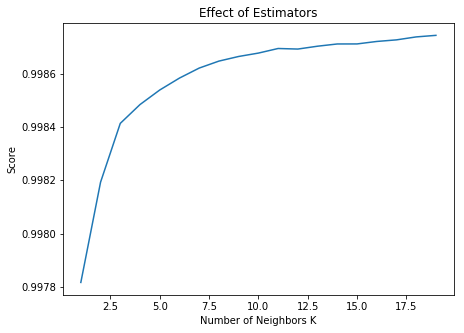

In [84]:
# Try different numbers of n_estimators - this will take a minute or so
n_neighbors = np.arange(1, 20, 1)
scores = []

for n in n_neighbors:
    model.set_params(n_neighbors=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)

## 2) Random Forest

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
model = RandomForestRegressor(n_jobs = -1)

[(10, 0.9996291194414227),
 (20, 0.9997203548882005),
 (30, 0.9997899250457843),
 (40, 0.999797560966554),
 (50, 0.9997884135289163),
 (60, 0.9997928765204758),
 (70, 0.9998019149174915),
 (80, 0.9998005640586803),
 (90, 0.9997910964651151),
 (100, 0.9998021359719195),
 (110, 0.9998099370482607),
 (120, 0.9998162883828042),
 (130, 0.9997924789889274),
 (140, 0.9997919128882795),
 (150, 0.9998147960660572),
 (160, 0.9998047908807413),
 (170, 0.999803621908272),
 (180, 0.9998042540022383),
 (190, 0.9998115802687224)]

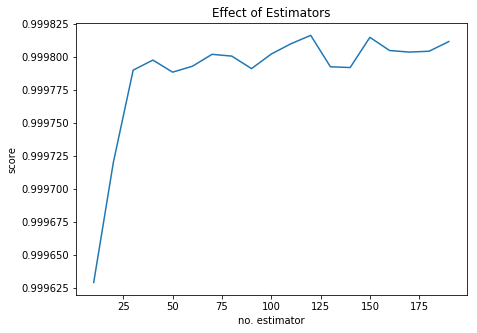

In [87]:
estimators = np.arange(10, 200, 10)
scores = []

for n in estimators:
    model.set_params(n_estimators = n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_train, y_train))
    
plt.figure(figsize = (7,5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

results = list(zip(estimators, scores))
results

In [89]:
model = RandomForestRegressor(n_jobs = -1, n_estimators = 150)

In [90]:
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print('Accuracy: {0:.2f} %' .format(accuracy*100))

Accuracy: 99.88 %


### Train

In [91]:
predictions = model.predict(X_test)
predictions = np.exp(predictions) - 1

predictions

array([ 0.74890127,  0.88680334,  0.8518527 , ...,  0.76874193,
        0.86734281, -0.98168436])

In [92]:
# change y_test values into integer values, because y_test have log values
y_test_int = np.exp(y_test) - 1
y_test_int.head()

8736    0.785672
1888    0.884153
4984    0.864997
811     0.864997
6885    0.958359
Name: Rating_log, dtype: float64

In [93]:
table = pd.DataFrame({'actual': y_test_int, 'predict': predictions})
table.head()

,actual,predict
8736,0.785672,0.748901
1888,0.884153,0.886803
4984,0.864997,0.851853
811,0.864997,0.912807
6885,0.958359,0.857285
